# Decision Tree

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from src.decisiontree import DecisionTree
import src.utils as utils

In [2]:
df = pd.read_csv("data/diamonds.csv")
df_copy = df.copy()
X, y, scaler = utils.preprocessing_no_drop(df)
X.shape, y.shape

((46377, 9), (46377,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
	'max_depth': [3, 5, 8, 10, 15]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7553167288430043, {'max_depth': 10}),
 (0.7481201812732935, {'max_depth': 8}),
 (0.7471228476338909, {'max_depth': 15}),
 (0.7374464503189209, {'max_depth': 5}),
 (0.7154793873726888, {'max_depth': 3})]

Seems the optimal max_depth is between 10 and 8

In [5]:
param_grid = {
	'max_depth': [7, 8, 9, 10, 11]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7553167288430043, {'max_depth': 10}),
 (0.7532412970985304, {'max_depth': 11}),
 (0.7504380771257788, {'max_depth': 9}),
 (0.7481201812732935, {'max_depth': 8}),
 (0.7437537606362944, {'max_depth': 7})]

In [6]:
model = DecisionTree(random_state=42, max_depth=10)

In [7]:
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.753375555855006 std: 0.002923109416619036


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


In [8]:
model.fit(X_train, y_train)

DecisionTree(max_depth=10)

In [9]:
# DEPRECATED, this was for 6 features and depth = 6
# plt.figure(figsize=(170, 20))
# class_names = df_copy["cut"].unique()
# plot_tree(model, feature_names=X_train.columns, class_names=class_names, filled=True, fontsize=10)
# plt.show()

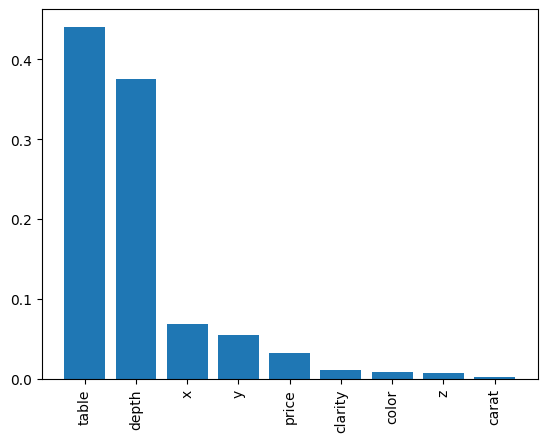

In [10]:
model.importances(features=X_train.columns, show=True)

Now let's remove some not important features and repeat the process.

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocessing_temp(df: pd.DataFrame):
	# Encode categorical to numerical
	le_cut = LabelEncoder()
	le_color = LabelEncoder()
	le_clarity = LabelEncoder()
	df["cut"] = le_cut.fit_transform(df["cut"])
	df["color"] = le_color.fit_transform(df["color"])
	df["clarity"] = le_clarity.fit_transform(df["clarity"])

	# Drop unnecesary columns
	df = df.drop(columns=["Unnamed: 0", "carat"])

	# Separate X and y
	y_scaled = df["cut"]
	X_scaled = df.drop(columns=["cut"])

	# Standarize
	features = ["color", "clarity", "depth", "table", "price", "x", "y", "z"]
	scaler = StandardScaler()
	X_scaled = pd.DataFrame(scaler.fit_transform(
		X_scaled.to_numpy()), columns=features)

	# Remove outliers
	for feature in features:
		Q1 = X_scaled[feature].quantile(0.25)
		Q3 = X_scaled[feature].quantile(0.75)
		IQR = Q3 - Q1

		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR

		condition = (X_scaled[feature] >= lower_bound) & (X_scaled[feature] <= upper_bound)
		X_scaled = X_scaled[condition]
		y_scaled = y_scaled[condition]

	return X_scaled, y_scaled, scaler

df = pd.read_csv("data/diamonds.csv")
df_copy = df.copy()
X, y, scaler = preprocessing_temp(df)
X.head()

,color,clarity,depth,table,price,x,y,z
0,-0.937163,-0.484264,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-0.937163,-1.064117,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
3,1.414272,0.675442,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,2.002131,-0.484264,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
5,2.002131,1.835148,0.733344,-0.204605,-0.901589,-1.596752,-1.553707,-1.500277


In [12]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
	'max_depth': [3, 5, 8, 10, 15]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7505243838489774, {'max_depth': 10}),
 (0.7449659150498165, {'max_depth': 8}),
 (0.7407184058730991, {'max_depth': 15}),
 (0.7334294703723125, {'max_depth': 5}),
 (0.7087572102779234, {'max_depth': 3})]

In [13]:
param_grid = {
	'max_depth': [7, 8, 9, 10, 11]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7505243838489774, {'max_depth': 10}),
 (0.7501048767697954, {'max_depth': 11}),
 (0.7459360251704248, {'max_depth': 9}),
 (0.7449659150498165, {'max_depth': 8}),
 (0.7407184058730991, {'max_depth': 7})]

In [14]:
model = DecisionTree(random_state=42, max_depth=10)
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.7511798636601993 std: 0.002712134355738985


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


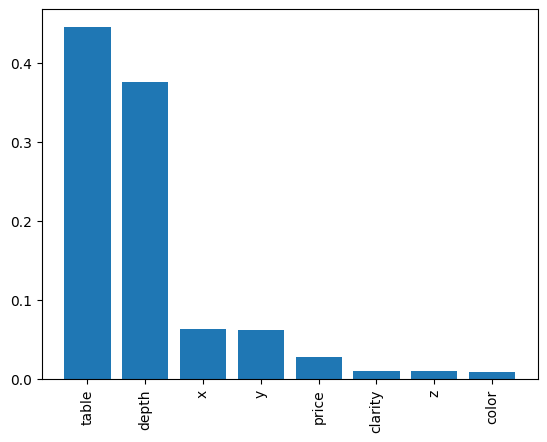

In [15]:
model.fit(X_train, y_train)
model.importances(features=X_train.columns, show=True)

We observe that without `carat`, the model has less accuracy (mean: 0.753 -> 0.751) but less variance (std: 0.0029 -> 0.0027). But the change is minimal.

Now let's try combining `x`, `y` and `z` into one single feature.

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocessing_temp(df: pd.DataFrame):
	# Encode categorical to numerical
	le_cut = LabelEncoder()
	le_color = LabelEncoder()
	le_clarity = LabelEncoder()
	df["cut"] = le_cut.fit_transform(df["cut"])
	df["color"] = le_color.fit_transform(df["color"])
	df["clarity"] = le_clarity.fit_transform(df["clarity"])

	# Drop unnecesary columns
	df = df.drop(columns=["Unnamed: 0"])

	# Define combination of x, y, z
	df["volume"] = df["x"] * df["y"] * df["z"]
	df = df.drop(columns=["x", "y", "z"])

	# Separate X and y
	y_scaled = df["cut"]
	X_scaled = df.drop(columns=["cut"])

	# Standarize
	features = ["carat", "color", "clarity", "depth", "table", "price", "volume"]
	scaler = StandardScaler()
	X_scaled = pd.DataFrame(scaler.fit_transform(
		X_scaled.to_numpy()), columns=features)

	# Remove outliers
	for feature in features:
		Q1 = X_scaled[feature].quantile(0.25)
		Q3 = X_scaled[feature].quantile(0.75)
		IQR = Q3 - Q1

		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR

		condition = (X_scaled[feature] >= lower_bound) & (X_scaled[feature] <= upper_bound)
		X_scaled = X_scaled[condition]
		y_scaled = y_scaled[condition]

	return X_scaled, y_scaled, scaler

df = pd.read_csv("data/diamonds.csv")
df_copy = df.copy()
X, y, scaler = preprocessing_temp(df)
X.head()

,carat,color,clarity,depth,table,price,volume
0,-1.198168,-0.937163,-0.484264,-0.174092,-1.099672,-0.904095,-1.171294
1,-1.240361,-0.937163,-1.064117,-1.360738,1.585529,-0.904095,-1.218533
3,-1.071587,1.414272,0.675442,0.454133,0.242928,-0.902090,-1.062372
4,-1.029394,2.002131,-0.484264,1.082358,0.242928,-0.901839,-0.996008
5,-1.177071,2.002131,1.835148,0.733344,-0.204605,-0.901589,-1.165007


In [17]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
	'max_depth': [3, 5, 8, 10, 15]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.73735717537364, {'max_depth': 8}),
 (0.7348231956341424, {'max_depth': 5}),
 (0.734257063436961, {'max_depth': 10}),
 (0.7134731542709783, {'max_depth': 3}),
 (0.7083782478803421, {'max_depth': 15})]

In [18]:
param_grid = {
	'max_depth': [4, 5, 6, 7, 8, 9]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.737572925056922, {'max_depth': 7}),
 (0.73735717537364, {'max_depth': 8}),
 (0.7364675930416876, {'max_depth': 9}),
 (0.7364406751950717, {'max_depth': 6}),
 (0.7348231956341424, {'max_depth': 5}),
 (0.7288928332550395, {'max_depth': 4})]

In [19]:
model = DecisionTree(random_state=42, max_depth=7)
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.7380862533692724 std: 0.0019854821413156877


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


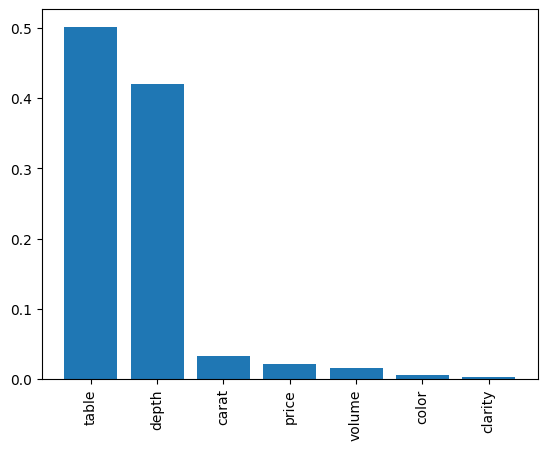

In [20]:
model.fit(X_train, y_train)
model.importances(features=X_train.columns, show=True)

The accuracy has decreased a bit more (mean: 0.753 -> 0.738). Also, we observe that, after this combination of features, `carat` gains more much importance, which make us think that maybe we should keep it, as its importance agains other features is not clear at all.

Let's make one last attempt, this time we will use one hot encoding for the categorical features (except the `cut`, which makes more sense to encode it to a range [0,4])

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocessing_temp(df: pd.DataFrame):
	# Encode categorical to numerical
	le_cut = LabelEncoder()

	df["cut"] = le_cut.fit_transform(df["cut"])
	df = pd.get_dummies(df, columns=["color", "clarity"])

	# Drop unnecesary columns
	df = df.drop(columns=["Unnamed: 0"])

	# Separate X and y
	y = df["cut"]
	X = df.drop(columns=["cut"])

	# Standarize
	one_hot_features = df.columns[df.columns.str.contains("color|clarity")]
	features = ["carat", "depth", "table", "price"]
	scaler = StandardScaler()
	# scale only "features", then concatenate with "one_hot_features"
	X_scaled = pd.DataFrame(scaler.fit_transform(X[features].to_numpy()), columns=features)
	X_scaled = pd.concat([X_scaled, X[one_hot_features]], axis=1)

	# Remove outliers
	for feature in features:
		Q1 = X_scaled[feature].quantile(0.25)
		Q3 = X_scaled[feature].quantile(0.75)
		IQR = Q3 - Q1

		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR

		condition = (X_scaled[feature] >= lower_bound) & (X_scaled[feature] <= upper_bound)
		X_scaled = X_scaled[condition]
		y = y[condition]

	return X_scaled, y, scaler

df = pd.read_csv("data/diamonds.csv")
df_copy = df.copy()
X, y, scaler = preprocessing_temp(df)
print(len(X.columns))
X.head()

19


,carat,depth,table,price,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-0.904095,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.360738,1.585529,-0.904095,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-1.071587,0.454133,0.242928,-0.902090,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,-1.029394,1.082358,0.242928,-0.901839,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,-1.177071,0.733344,-0.204605,-0.901589,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [12]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
	'max_depth': [5, 10, 15, 20, 25]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7369854733877347, {'max_depth': 10}),
 (0.7342100682428888, {'max_depth': 5}),
 (0.714351408312987, {'max_depth': 15}),
 (0.6793493737719287, {'max_depth': 20}),
 (0.6620773127054211, {'max_depth': 25})]

In [13]:
param_grid = {
	'max_depth': [4, 5, 6, 7, 8, 9, 10, 11]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7383596534952777, {'max_depth': 8}),
 (0.738332761033578, {'max_depth': 9}),
 (0.7372009615797549, {'max_depth': 7}),
 (0.737093213853553, {'max_depth': 6}),
 (0.7369854733877347, {'max_depth': 10}),
 (0.7342100682428888, {'max_depth': 5}),
 (0.7338867669812119, {'max_depth': 11}),
 (0.7293059149294292, {'max_depth': 4})]

In [14]:
model = DecisionTree(random_state=42, max_depth=8)
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.7382459921864475 std: 0.006012640065855147


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


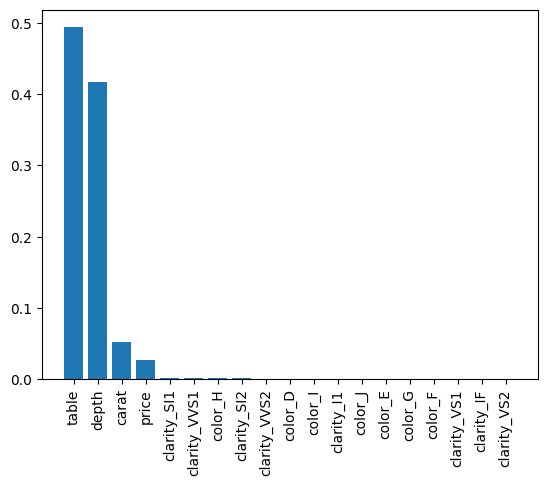

In [15]:
model.fit(X_train, y_train)
model.importances(features=X_train.columns, show=True)

We can see the accuracy decreased (mean: 0.753 -> 0.738), and the importance of the hot-encoded features is very low. Due to the nature of Decision Trees, it might not make sense at all to one-hot encode features, but with this experiment we have ensured of it.

After all this analysis we made with the help of decision trees, we conclude that the best we can do is train the models with all the features.